# Wine data clustering

The data for this project corresponds to a chemical analysis of three types of wines grown in the  same region in Italy. The analysis determined the quantities of 13 constituents found in each type. The data was originally posted in the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine) 

It was adapted for clustering by Harry Wang by taking out the data type and posted on [Kaggle](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

The goal for this project is to go through each of the steps in a clustering analysis by using different clustering algorithms. Using K-means and Aglomerative clustering, we will test the hypothesis that there are three varities of wine in the dataset.  

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data 
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


There are no missing values and the data types are either integers or floats. All variables are numerical characteristics of wine. 

In [4]:
## Statistics for all 13 features
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Initial Scaterplot Analysis

In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

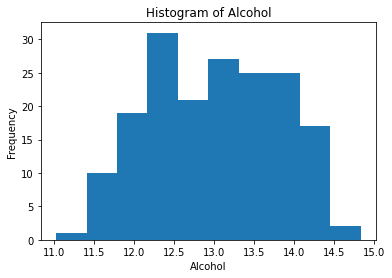

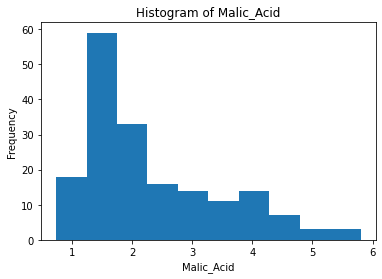

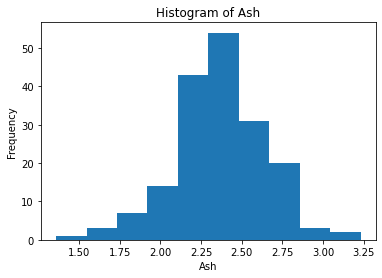

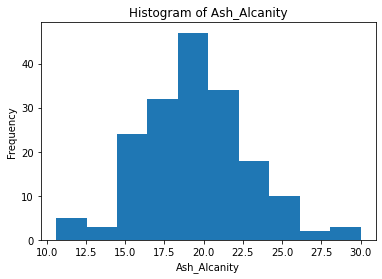

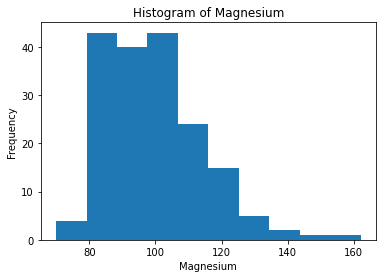

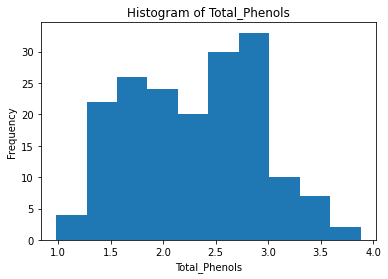

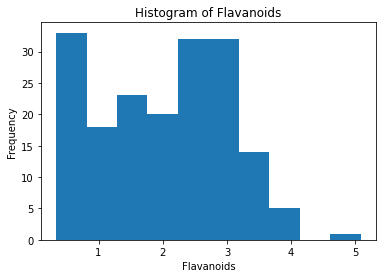

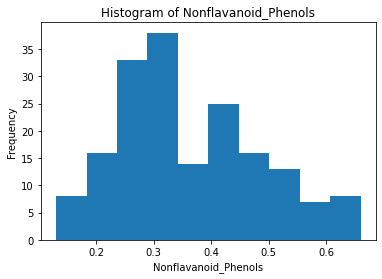

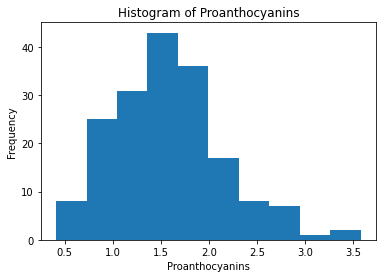

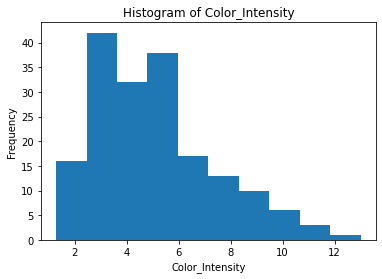

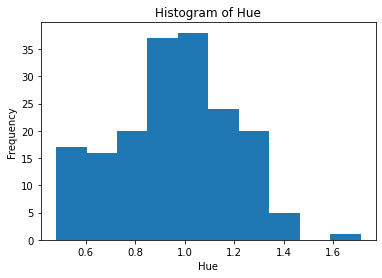

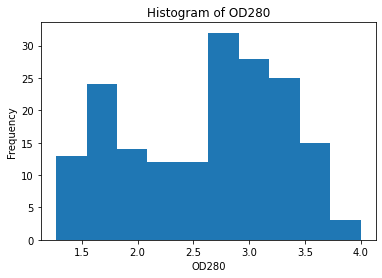

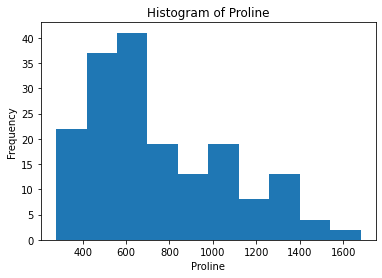

In [6]:
for column in df.columns:
    
    # Draw a histogram
    plt.figure()
    plt.hist(df[column], bins= 10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    print('\n') 

Although only `Ash Alcalinity` seems to be a normal distribution, there doesn't seem to be a reason to believe that the others should. We don't see extreme skews in most, which could lead us to believe that the data would need some log transformation. Let's produce scaterplots. 

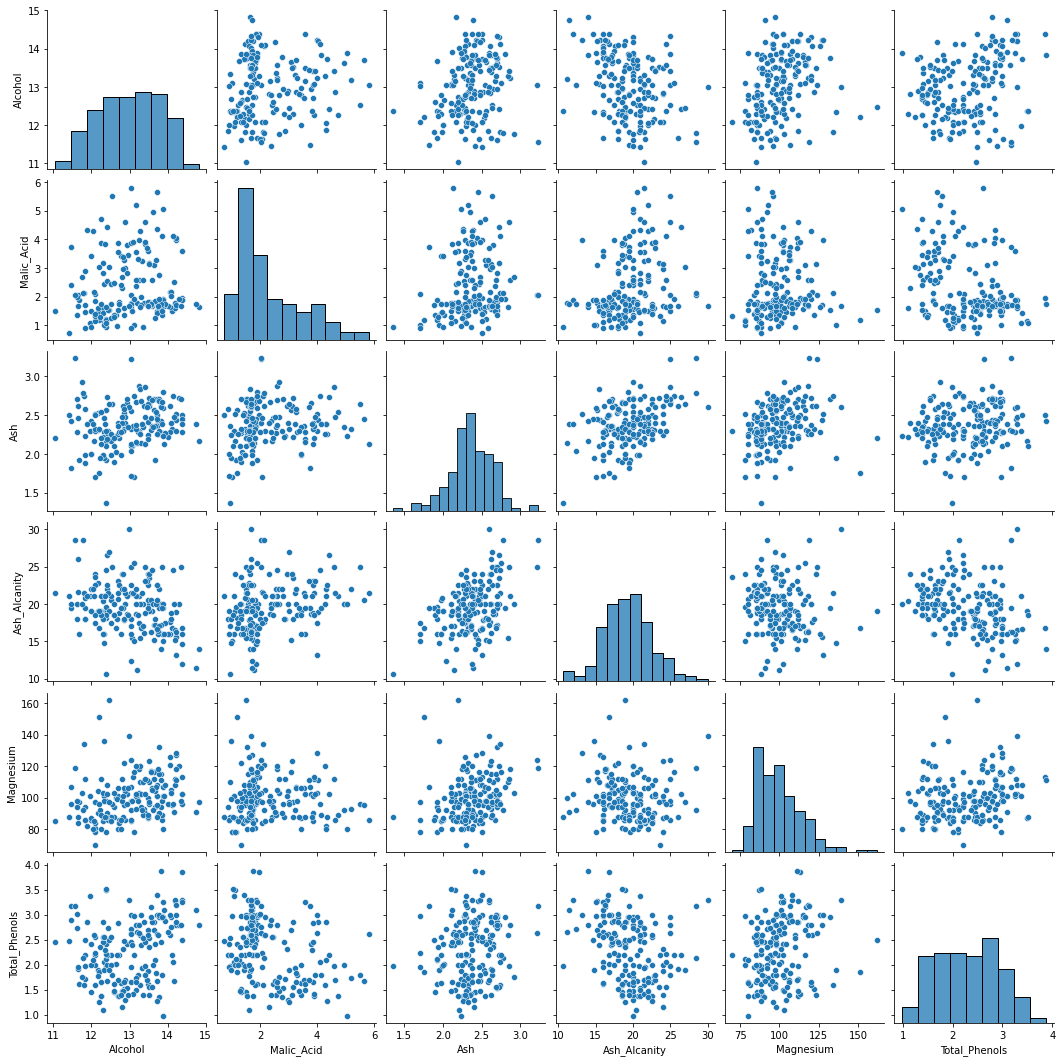

In [9]:
## Pairploting against eachother
sns.pairplot(df.iloc[:, 0:6]);

Some features like `Ash_Alcanity`and `Total_Phenols` have positive and negative correlations with other features. This might be helpelful when clustering. 

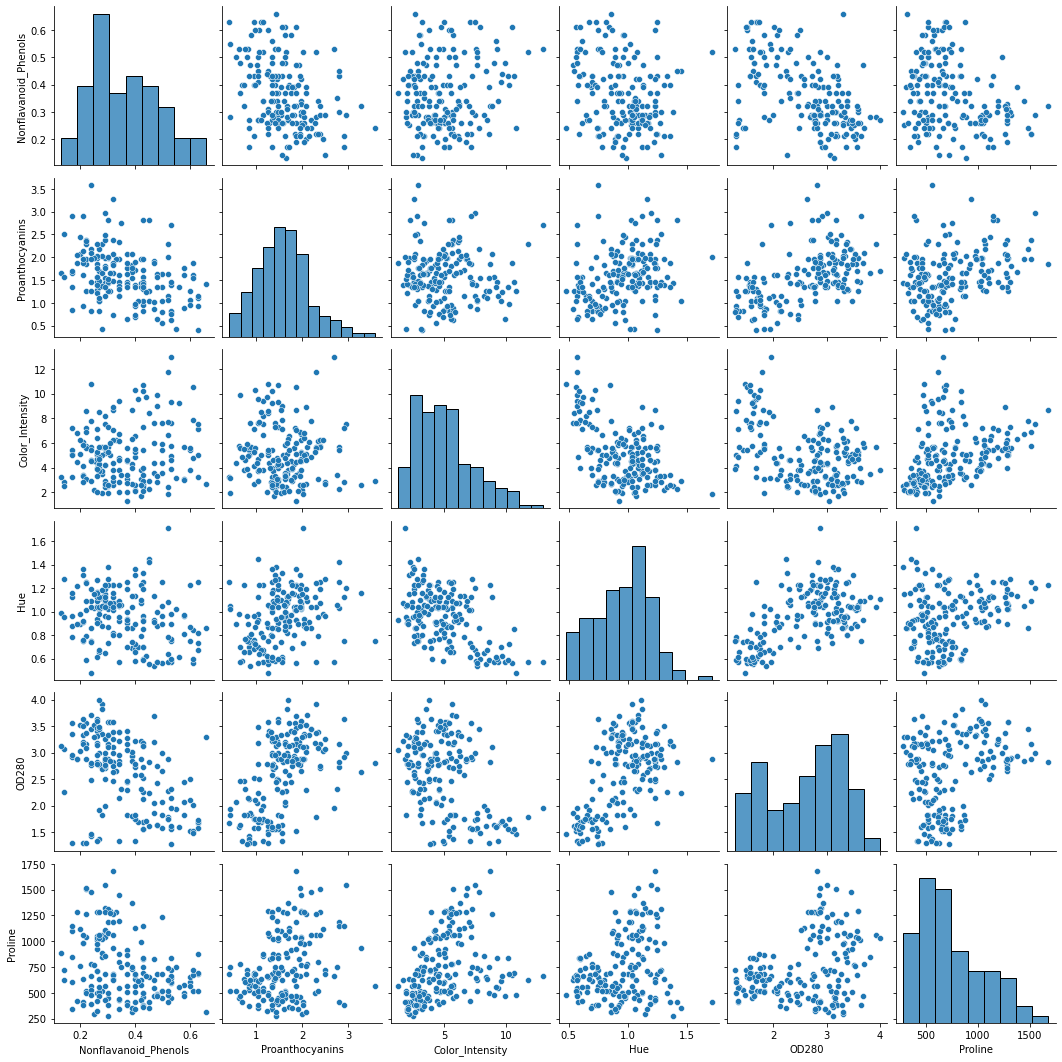

In [10]:
## Pairploting against eachother
sns.pairplot(df.iloc[:, 7:13]);

In this case, `Proanthocyannis`and `Hue` seem to have marked positive and negative correlations with other features. This is also helpful for the clustering analysis. 

### Visualizing using PCA 

Principal component analysis can identify the first few "most important" components, which show the most variance within the data. These will be useful viewing angles for determining how many clusters are suitable for this dataset.

In [11]:
# We'll need to scale the data first
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

In [12]:
## Now, applying PCA
from sklearn.decomposition import PCA

# create our PCA object, we'll look at the first 4 principal components
my_pca = PCA(n_components=4)

# transform our scaled data
pc_data = my_pca.fit_transform(scaled_data)

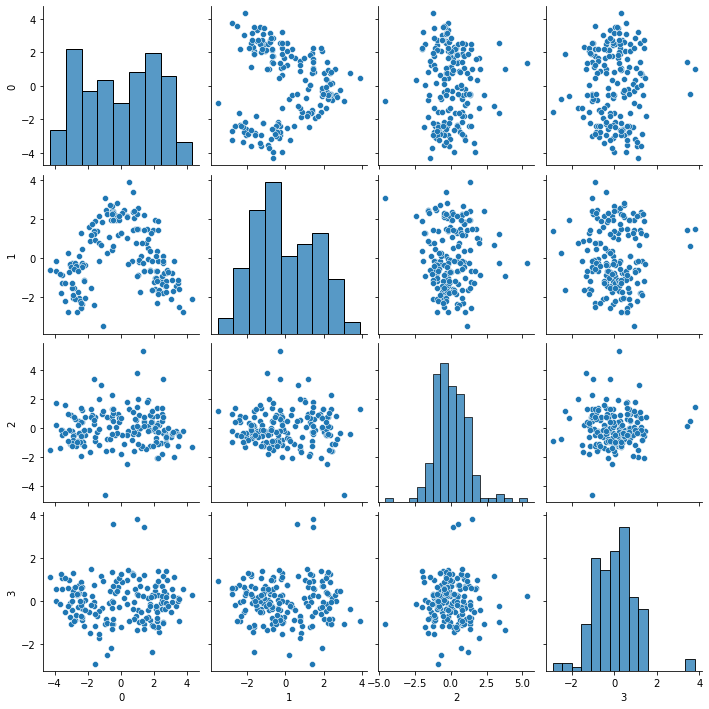

In [13]:
## Now let's visualize the scatterplot using PCA data
sns.pairplot(pd.DataFrame(pc_data));

There are hints of two or three clusters in both PCA 0 and PCA 1.

### Visualizing with t-SNE

This is a technique for visualizing high-dimensional data in 2D while preserving much of the high-dimensional structure. We choose two components to visualize in 2D. 

In [14]:
from sklearn.manifold import TSNE

my_tsne = TSNE(n_components=2) 
tsne_data = my_tsne.fit_transform(scaled_data)

In [15]:
tsne_data

array([[ -8.859505  ,   7.303121  ],
       [ -4.9287386 ,   6.021685  ],
       [ -5.507546  ,  10.322837  ],
       [ -8.390634  ,  10.075313  ],
       [ -1.4939142 ,  10.079572  ],
       [ -7.717043  ,  10.594344  ],
       [ -5.6198545 ,   8.020164  ],
       [ -3.3230178 ,  10.220482  ],
       [ -6.249658  ,   7.8009562 ],
       [ -6.9937835 ,   8.243425  ],
       [ -6.7246323 ,  10.963864  ],
       [ -4.740382  ,   7.8375354 ],
       [ -5.0127997 ,   8.420587  ],
       [ -9.421058  ,  11.3792925 ],
       [ -9.013036  ,  11.203304  ],
       [ -4.069118  ,  10.51213   ],
       [ -4.401036  ,  11.399039  ],
       [ -4.0394464 ,  11.286201  ],
       [ -7.5848026 ,  11.447522  ],
       [ -7.6106277 ,   5.5160613 ],
       [ -8.614793  ,   7.1437883 ],
       [ -4.542873  ,   4.0554113 ],
       [ -4.9089837 ,   7.057267  ],
       [ -2.9740822 ,   7.0167584 ],
       [ -2.645079  ,   7.163659  ],
       [ -0.933337  ,  10.450018  ],
       [ -4.106387  ,   8.845699  ],
 

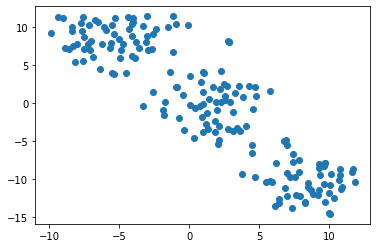

In [16]:
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

We can already see that there are 3 clusters. The next step is the clustering analysis using different algorithms.  

## Clustering Analysis

### K-Means

In [19]:
from sklearn.cluster import KMeans

# define number of clusters to try out: 7 is ehough for the size of this dataset
# I will plot intertia in the next graph
k_values = range(1, 8)
inertia_list = []

for k in k_values:
    
    # instantiate a kmeans clusterer
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_data)
    
    # calculate the Inertia score and append to list
    inertia_list.append(kmeans.inertia_)

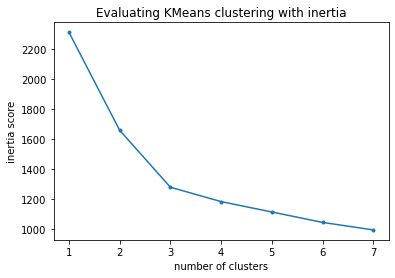

In [20]:
# Visualize the skree plot (elbow plot)
plt.figure()
plt.plot(k_values, inertia_list, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.title('Evaluating KMeans clustering with inertia')
plt.show()

Three seems to be the point of inflextion in the elbow of the skree plot. Let's check the silhoutte score. 

In [23]:
from sklearn.metrics import silhouette_score

k_values = range(2, 8)
silhouette_scores = []

for k in k_values:
    
    # instantiate a kmeans clusterer
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_data)
    
    # calculate the Silhouette score and append to list
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette)

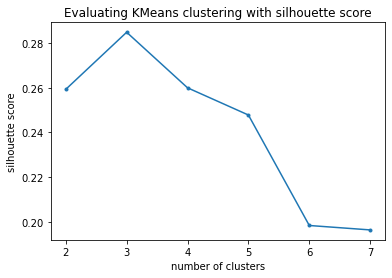

In [24]:
# Visualize the results
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('Evaluating KMeans clustering with silhouette score')
plt.show()

Three clusters maximizes the silhoutte score, which is in line with the TSE Score. Let's use additional algorithms. 

### Aglomerative clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

k_values = range(2,8)
silhouette_scores = []

for k in k_values:
    
    # instantiate and fit our agglomerative clusterer
    aggclust = AgglomerativeClustering(n_clusters = k)
    aggclust.fit(scaled_data)
    
    # get cluster labels and calculate the silhouette score
    cluster_labels = aggclust.labels_
    silhouette = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette)

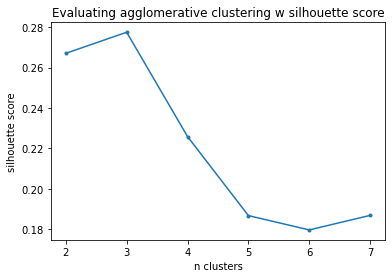

In [26]:
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('n clusters')
plt.ylabel('silhouette score')
plt.title('Evaluating agglomerative clustering w silhouette score')
plt.show()

Again, three clusters has the best silhoutte score. 

### Including results in the df

Both clustering techniques gave the highest scores when the number of clusters was 3. Let's re-fit two clustering models with 3 clusters and add the cluster membership as a column in our original dataset for further visualization and analysis. 

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

df['kmeans_label'] = kmeans.labels_

In [37]:
aggclust = AgglomerativeClustering(n_clusters=3)
aggclust.fit(scaled_data)

df['agg_label'] = aggclust.labels_

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  kmeans_label          178 non-null    int32  
 14  agg_label             178 non-null    int64  
dtypes: float64(11), int32(1

Visualizing these clusters with the previous TSE and PCA analysis

In [39]:
pca_df = pd.DataFrame(pc_data)
pca_df['kmeans_labels'] = kmeans.labels_
pca_df['agg_labels'] = aggclust.labels_

In [40]:
pca_df.head()

,0,1,2,3,kmeans_labels,agg_labels
0,3.316751,-1.443463,-0.165739,-0.215631,1,2
1,2.209465,0.333393,-2.026457,-0.291358,1,2
2,2.516740,-1.031151,0.982819,0.724902,1,2
3,3.757066,-2.756372,-0.176192,0.567983,1,2
4,1.008908,-0.869831,2.026688,-0.409766,1,2


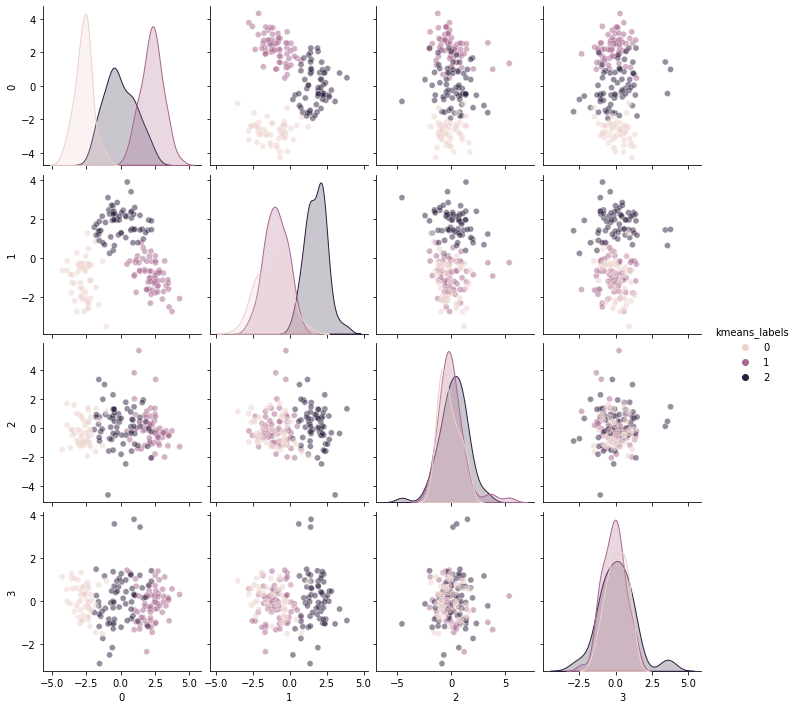

In [41]:
sns.pairplot(pca_df.drop(columns='agg_labels'), hue='kmeans_labels', plot_kws={'alpha': 0.5})

As we supposed above, components 0 and 1 are more adept at identifying the clusters, especially in the 1,0 combination. 

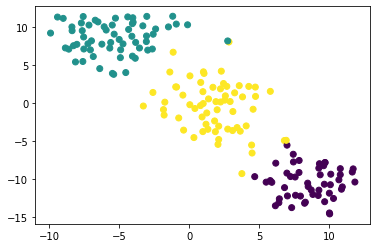

In [42]:
## For the K-means cluster
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=pca_df['kmeans_labels'])
plt.show()

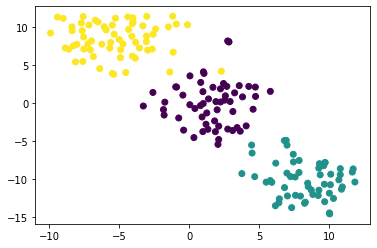

In [43]:
## For the aglomerative cluster
plt.figure()
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=pca_df['agg_labels'])
plt.show()


The results are similar. Let´s look at this quantitatively. 

### Quantitative properties of the clusters

#### K-means

In [44]:
df.drop(columns='agg_label').groupby('kmeans_label').mean().transpose()

kmeans_label,0,1,2
Alcohol,13.134118,13.676774,12.250923
Malic_Acid,3.307255,1.997903,1.897385
Ash,2.417647,2.466290,2.231231
Ash_Alcanity,21.241176,17.462903,20.063077
Magnesium,98.666667,107.967742,92.738462
Total_Phenols,1.683922,2.847581,2.247692
Flavanoids,0.818824,3.003226,2.050000
Nonflavanoid_Phenols,0.451961,0.292097,0.357692
Proanthocyanins,1.145882,1.922097,1.624154
Color_Intensity,7.234706,5.453548,2.973077


- Cluster 0 has by far the highest malid acid reading, ash alcanity and color intensity, while the lowest hue  
- Cluster 1 has the highest average alcohol and proline levels
- Cluster 2 has the lowest proline and alcohol levels.  

#### Aglomerative 

In [45]:
df.drop(columns='kmeans_label').groupby('agg_label').mean().transpose()

agg_label,0,1,2
Alcohol,12.203966,13.061607,13.669219
Malic_Acid,1.938966,3.166607,1.970000
Ash,2.215172,2.412857,2.463125
Ash_Alcanity,20.208621,21.003571,17.528125
Magnesium,92.551724,99.857143,106.156250
Total_Phenols,2.262931,1.694286,2.850000
Flavanoids,2.088103,0.847857,3.009688
Nonflavanoid_Phenols,0.355345,0.449464,0.291094
Proanthocyanins,1.686552,1.129286,1.908125
Color_Intensity,2.895345,6.850179,5.450000


- Cluster 2 in this case has the highest alcohol and Proline levels, like cluster 1 in the K-Means analysis. 
- Cluster 0: has the lowest alcoholo and proline, similar to the case of the previous cluster 2. 
- Cluster 1, cluster 1 shows high malic acid and ash alcanity like the previous cluster 0. 

In [46]:
## Checking a quick crosst tab
pd.crosstab(df['kmeans_label'], df['agg_label'])

agg_label,0,1,2
kmeans_label,,,
0,0,51,0
1,1,0,61
2,57,5,3


The points of coincidence are fairly large in all pairs. There is not a lot of data in the diagonal. It seems that these groups have been well clustered. 

In [48]:
pd.crosstab(df['kmeans_label'], df['agg_label']) / len(df)

agg_label,0,1,2
kmeans_label,,,
0,0.000000,0.286517,0.000000
1,0.005618,0.000000,0.342697
2,0.320225,0.028090,0.016854


If we chose the highest value for each cluster, ~95% of observations are identified by both methods into one specific cluster. 

The Adjusted Rand Index is a score that captures the degree of agreement between 2 labellings. The score ranges between 0 and 1, with numbers closer two 1 signaling more agreement. 

In [49]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df['kmeans_label'], df['agg_label'])

0.8529841218194189

The rand index is pointing to a fairly high agreement between both clustering methods. 

## Conclusion

Using two clustering methods, the data was fairly evenly separated into three groups. The t-SNE analysis also points to the three clusters. Therefore, we are fairly confident that, as expected, there are three varieties of wines in the dataset. 